<a href="https://colab.research.google.com/github/zoegarm/Equipo_2_P2_Analisis/blob/main/Pregunta5_respuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equipo 2**
## **Proyecto: Cáncer de mama en México**

#### Integrantes:
- Zoé Ariel García Martínez
- Atenea De La Cruz Brito
- Juan Luis Carrillo de la Cruz


### **Pregunta de investigación 5**
####**Pregunta 5. ¿Qué relación existe entre otras enfermedades y factores de riesgo con el cáncer de mama?**

####**Dataset 1:** Encuesta Nacional de Salud y Nutrición, Componente de Salud, México

- **Observaciones:** Individuos de 20 años o más, muestra
- **Periodo:** 2018
- **Archivo:** "ensanut_cancer.csv"
- **Fuente:** INEGI e INSP.

####**I. Exploración de Variables Categóricas y Análisis Multivariable**

In [ ]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
#Dataset encuesta ENSANUT limpia y sólo con registros de mastografías
df = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/ENSANUT2018/ensanut_cancer.csv", index_col=None)
df.head()

,obesidad,depresión,tristeza,fatiga,diabetes,hipertensión,infarto,angina_de_pecho,insuficiencia_cardiaca,vías_urinarias,cálculos_renales,insuficiencia_renal,exploración_senos,síntoma_previo_mama,cáncer_mama,fuma_actual,cigarro_electrónico,bebe_actual,edad,estado,urbano_rural,región,urbano_rurala
0,1,3,1,2,3,2,2,2,2,2,2,2,2,2,2,3,2,2,41,1,1,2,1
1,1,1,1,2,3,2,2,2,2,2,2,2,8,2,2,3,2,1,46,1,1,2,1
2,1,1,2,2,3,2,2,2,2,1,2,2,2,2,2,3,2,3,62,1,1,2,1
3,2,1,2,1,3,1,2,2,2,2,2,2,2,1,2,3,2,1,76,1,1,2,1
4,1,2,2,1,3,2,2,2,2,2,2,2,8,2,2,3,2,3,66,1,1,2,1
5,2,1,1,1,3,2,2,2,2,2,2,2,8,2,2,3,2,2,64,1,1,2,1
6,1,3,3,1,1,1,2,2,2,1,2,2,2,2,2,3,2,3,75,1,1,2,1
7,2,1,1,1,3,2,2,2,2,2,2,2,8,2,2,2,2,1,35,1,1,2,1


In [ ]:
#Agrupar por resultado de mastografía
por_paciente = df.groupby(level=0)[['edad', 'exploración_senos', 'síntoma_previo_mama']].last()
por_resultado = df.groupby(level=0)['cáncer_mama'].last()
unidos = por_paciente.merge(por_resultado, left_index=True, right_index=True)
#Resultados de mastografía 1=Positivo, 2=Negativo o bien
positivo = por_paciente[unidos['cáncer_mama'] == 1]
negativo = por_paciente[unidos['cáncer_mama'] == 2]

In [ ]:
por_paciente.head()

,edad,exploración_senos,síntoma_previo_mama
0,41,2,2
1,46,8,2
2,62,2,2
3,76,2,1
4,66,8,2


##### **I.I. Gráfica de densidad**

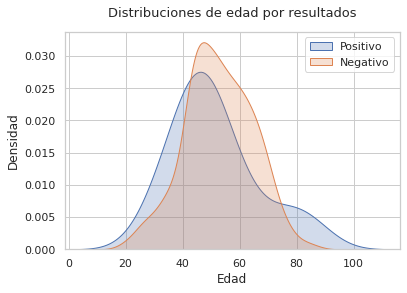

In [ ]:
#Gráfica forma 1: "plt" ó "pyplot"
sns.kdeplot(positivo['edad'], shade=True, label='Positivo')
sns.kdeplot(negativo['edad'], shade=True, label='Negativo')

plt.title('Distribuciones de edad por resultados', fontsize=13, pad=15)
plt.xlabel('Edad')
plt.ylabel('Densidad')

plt.legend(loc='upper right')
plt.show()

##### **I.II. Tabla de contingencias**

In [ ]:
#Tabla de contingencias
crossensanut = pd.crosstab(df['síntoma_previo_mama'], df['cáncer_mama'], margins=True, margins_name='Totales')
crossensanut
#Síntomas previos 1=Sí, 2=No
#La mayoría de los casos sin síntomas previos

cáncer_mama,1,2,Totales
síntoma_previo_mama,,,
1,10,84,94
2,3,381,384
Totales,13,465,478


##### **I.III. Boxplots y violinplots**

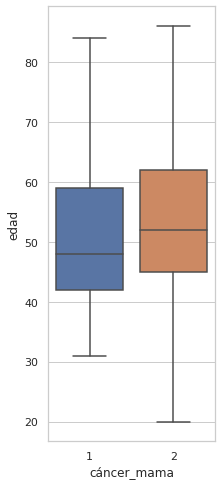

In [ ]:
#Boxplots y violinplots
plt.figure(figsize=(3,8))
sns.boxplot(data=unidos, x='cáncer_mama', y='edad');

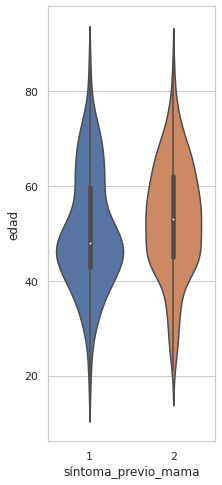

In [ ]:
plt.figure(figsize=(3,8))
sns.violinplot(data=unidos, x='síntoma_previo_mama', y='edad');

In [ ]:
#Grupo 2. Comorbilidades y cáncer
por_comorbilidad = df.groupby(level=0)[['obesidad', 'diabetes','hipertensión', 'infarto', 
                                        'angina_de_pecho', 'insuficiencia_cardiaca','vías_urinarias', 
                                        'cálculos_renales', 'insuficiencia_renal']].last()
unidos2 = por_comorbilidad.merge(por_resultado, left_index=True, right_index=True)
#'cáncer_mama'
#'obesidad', 'depresión', 'tristeza', 'fatiga', 'diabetes',
#       'hipertensión', 'infarto', 'angina_de_pecho', 'insuficiencia_cardiaca',
#       'vías_urinarias', 'cálculos_renales', 'insuficiencia_renal'

In [ ]:
#Grupo 3. Psicología y cáncer
por_psicologia = df.groupby(level=0)[['depresión', 'tristeza', 'fatiga']].last()
unidos3 = por_psicologia.merge(por_resultado, left_index=True, right_index=True)

In [ ]:
#Grupo 4. Factores de riesgo y cáncer
por_riesgo = df.groupby(level=0)[['fuma_actual', 'cigarro_electrónico', 'bebe_actual']].last()
unidos4 = por_riesgo.merge(por_resultado, left_index=True, right_index=True)

##### **I.III. Mapas de calor**
- Comorbilidades
- Estado de ánimo y psicológico
- Factores de riesgo

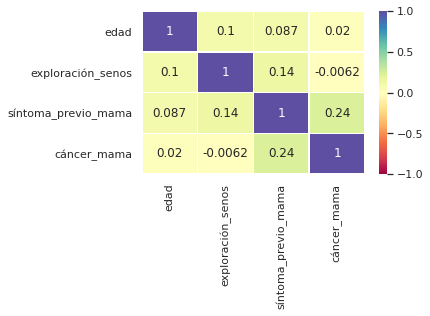

In [ ]:
#Mapa de calor 1. Cáncer
plt.figure(figsize=(5, 3))
ax = sns.heatmap(unidos.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#La mayor relación es entre síntomas previos y cáncer de mama.

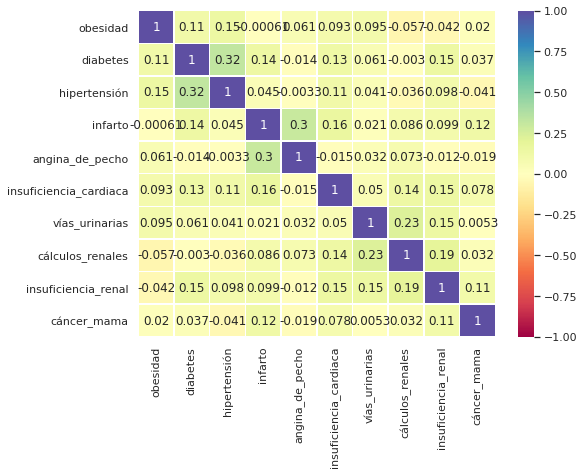

In [ ]:
#Mapa de calor 2. Comorbilidades
plt.figure(figsize=(8, 6))
ax = sns.heatmap(unidos2.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#Las relaciones más fuertes se encuentran entre hipertensión y diabetes así como angina de pecho e infarto.
#El cáncer de mama presenta poca relación, la más fuerte es con el infarto con sólo 12%

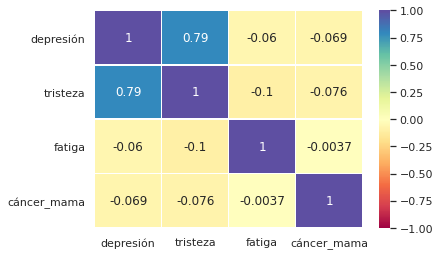

In [ ]:
#Mapa de calor 3. Psicología
plt.figure(figsize=(6, 4))
ax = sns.heatmap(unidos3.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#La tristeza y la depresión están correlacionadas, sin embargo no se relacionan con el cáncer de mama en la muestra.

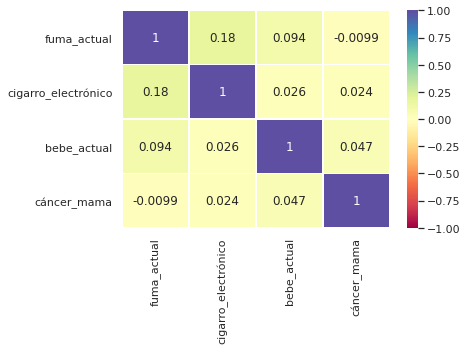

In [ ]:
#Mapa de calor 4. Factores de riesgo
plt.figure(figsize=(6, 4))
ax = sns.heatmap(unidos4.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#La única relación entre factores de riesgo se encuentra entre fumar tabaco y cigarro electrónico.
#Sin relación aparente con el cáncer de mama.

##### **I.IIII. Gráfica de pares**

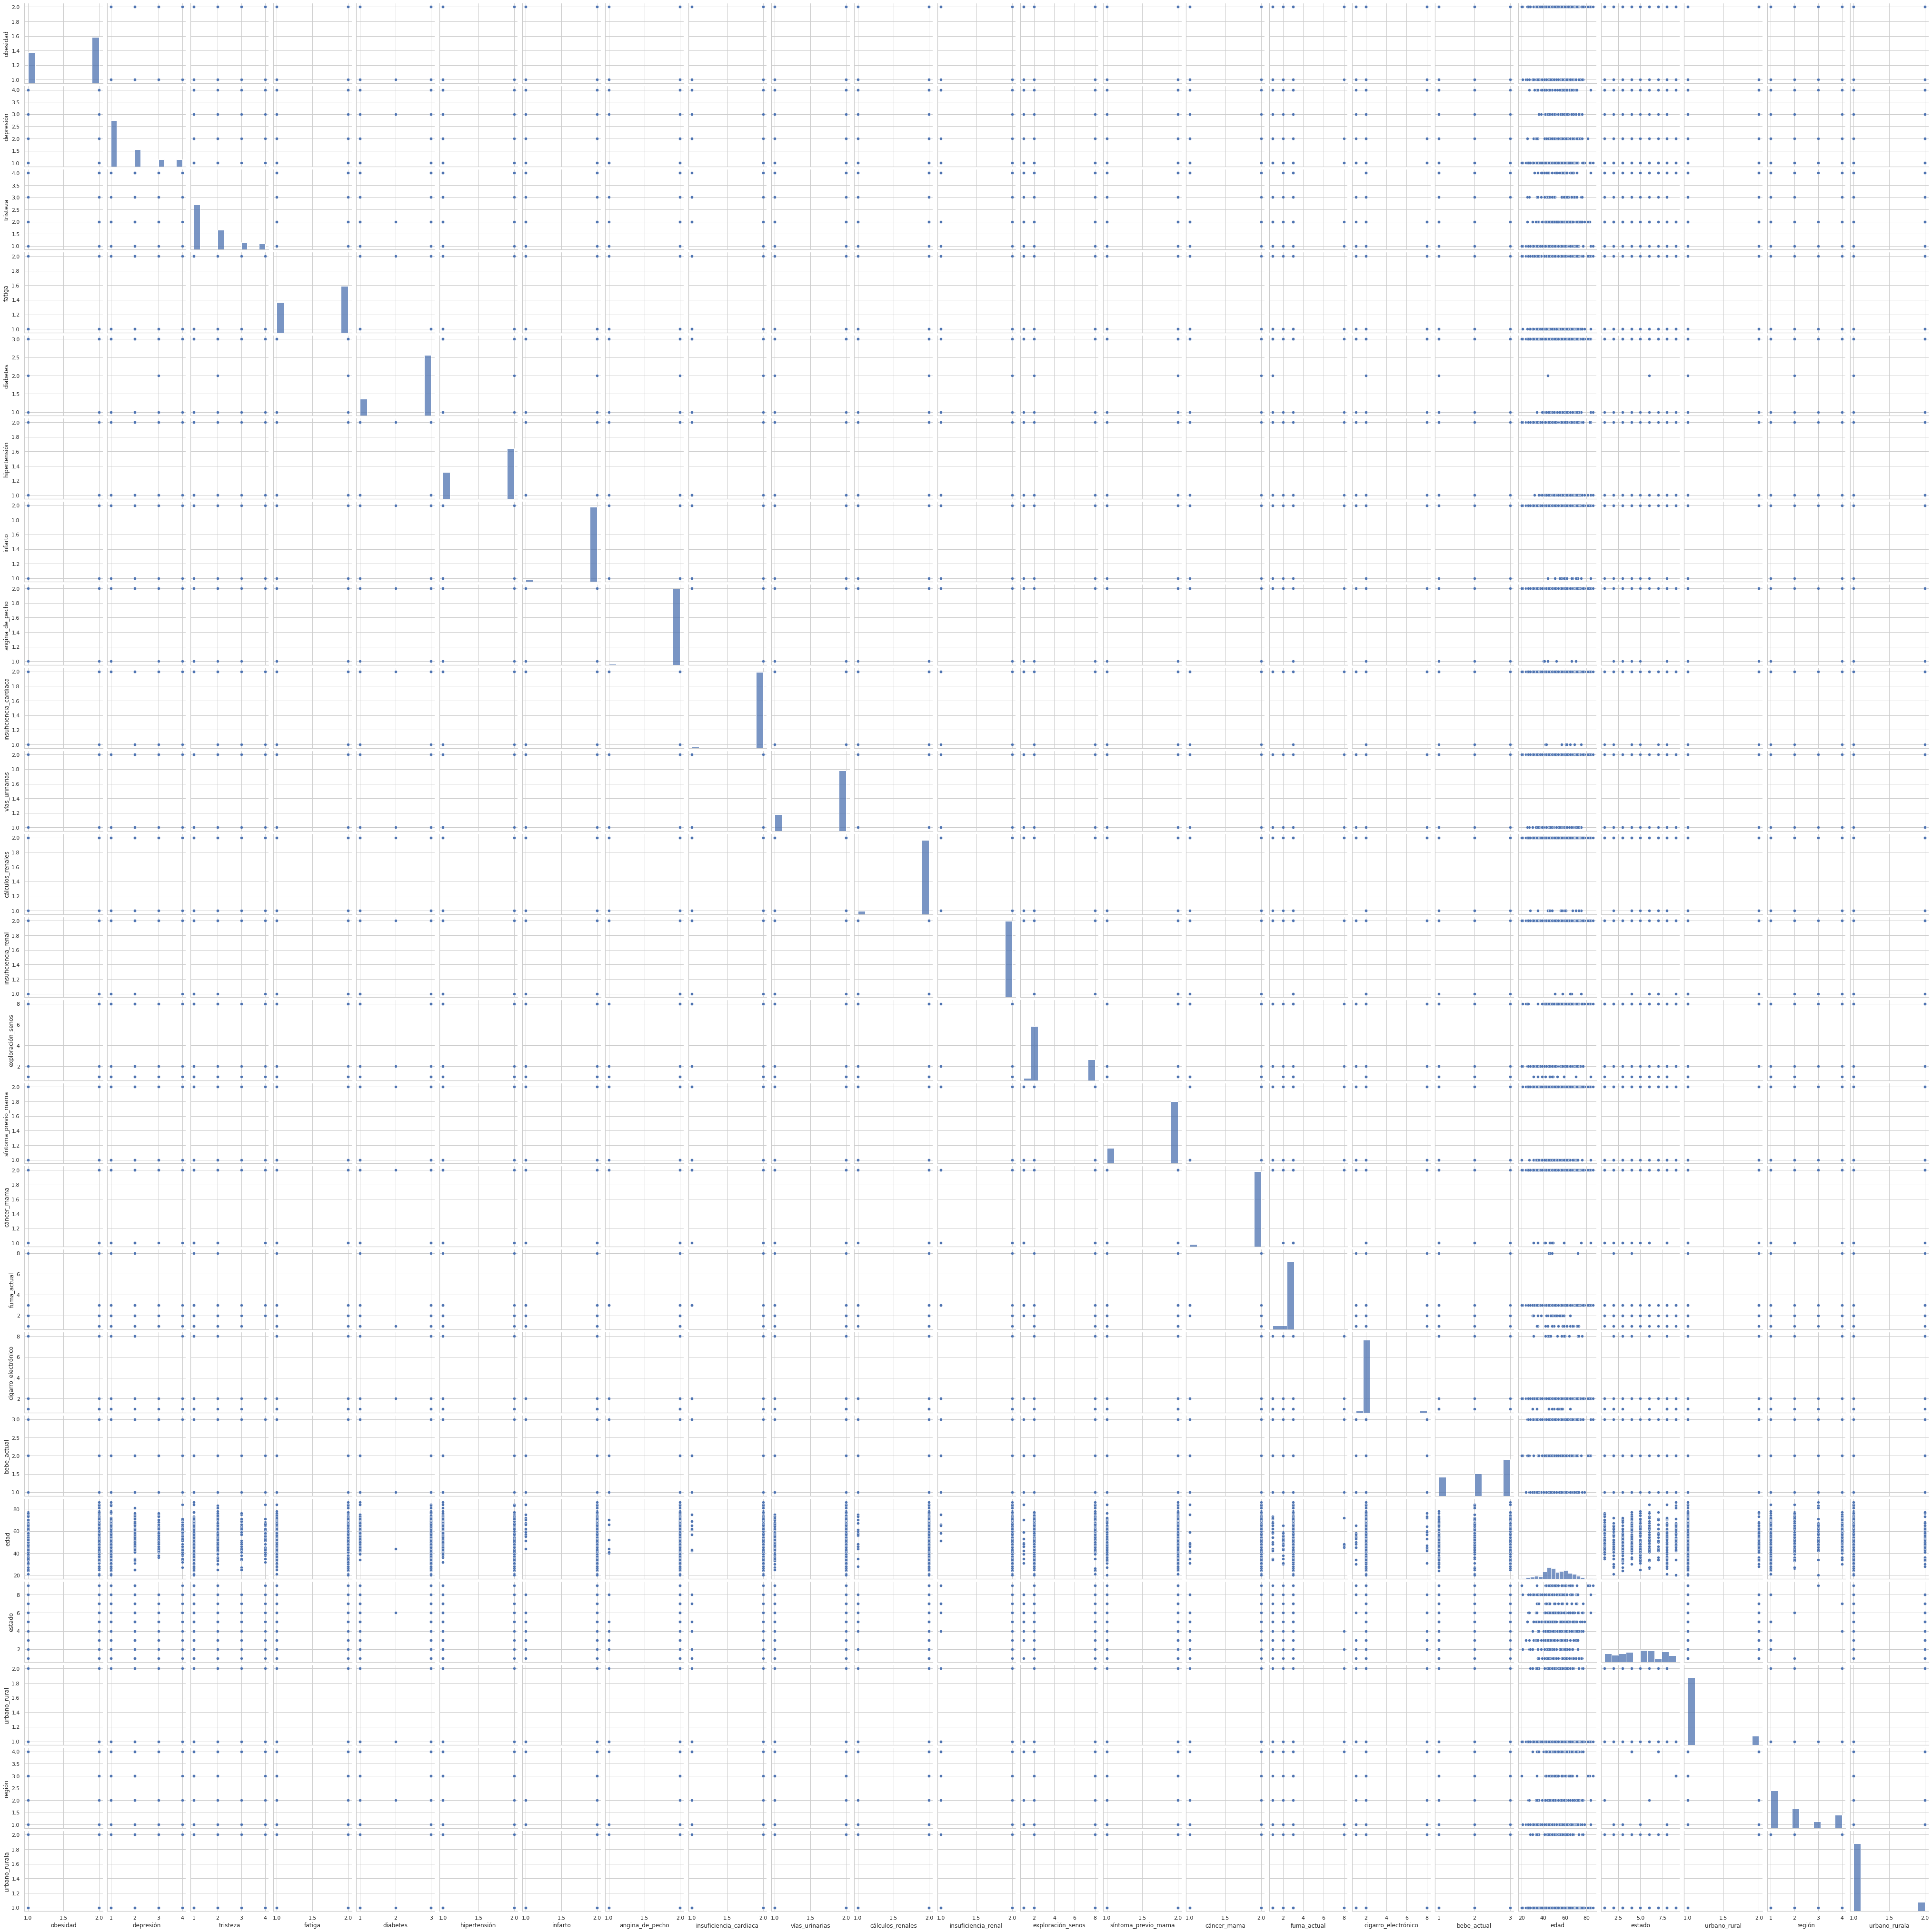

In [ ]:
#Gráfica de pares
sns.pairplot(df);

####** II. Regresión lineal**
Modelo base de predicción: regresión lineal (OLS)
- A pesar de que el modelo que mejor se adecúa a los datos es un logit, se calculará un OLS como primer paso.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#Regresión
lr = LinearRegression()

lr.fit(df['cáncer_mama'].to_frame(), df['síntoma_previo_mama'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicción
y_predict = lr.predict(df['cáncer_mama'].to_frame())

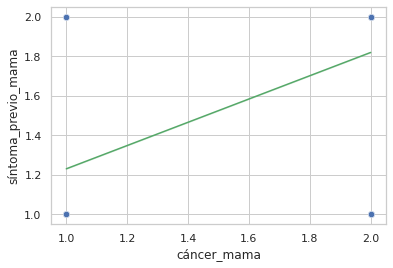

In [ ]:
sns.scatterplot(x= df['cáncer_mama'], y= df['síntoma_previo_mama'], s=40);
sns.lineplot(x= df['cáncer_mama'], y= y_predict, color='g');
#Como era de esperarse, el modelo lineal no permite apreciar una buena representación de los datos.
#Sin embargo, se distingue una correlación positiva.

In [ ]:
#R^2 Coeficiente de correlación
lr.score(df['cáncer_mama'].to_frame(), df['síntoma_previo_mama'])
#El R^2 es muy bajo, la variable síntoma_previo_mama sólo explica un 5.8% el cáncer de mama para la muestra.

0.05801716514439615

#### **III. Regresión logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Variable dependiente y= cáncer_mama, Variables independientes= resto del df
X = df.drop(columns=['cáncer_mama'])
y = df['cáncer_mama']

In [ ]:
#Separar, en este caso 30% de prueba y 70% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Regresión logística
log_reg = LogisticRegression(max_iter=10_000)

In [ ]:
#Ajustar
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicción
y_pred = log_reg.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Cercanía al resultado
log_reg.score(X_test, y_test)
#Como se puede observar con el coeficiente de correlación, el modelo explica en un 95.13% los resultados
#Muy por arriba del R^2 obtenido en el modelo lineal, que fue de 0.058017, es decir sólo 5.8%.

0.9513888888888888

#### **IV. Matriz de confusión**
- Evaluación del modelo

In [ ]:
from sklearn import  metrics

In [ ]:
#Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,   7],
       [  0, 137]])

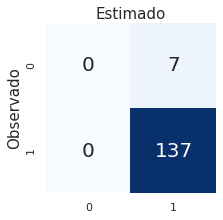

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Representación en heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Observado', fontsize=15, y=0.5)
plt.xlabel('Estimado', fontsize=15);

In [ ]:
#Clasificaciones verdadero negativo, falso positivo, falso negativo, verdadero negativo
VN, FP, FN, VP = cnf_matrix.ravel()
#Medidas
print("Precision:",metrics.precision_score(y_test, y_pred, average='binary', zero_division=1))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred, average='binary', zero_division=1))
print("Especificidad:", VN / (VN + FP))

Precision: 1.0
Exactitud: 0.9513888888888888
Sensibilidad: 0.0
Especificidad: 0.0


#### **V. Curva ROC**

- Evaluación del modelo mediante curva ROC y AUC.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#Resultados probabilísticos
y_pred_proba = log_reg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[4.47653532e-02, 9.55234647e-01],
       [3.57058879e-03, 9.96429411e-01],
       [7.33345841e-04, 9.99266654e-01],
       [1.03089686e-02, 9.89691031e-01],
       [5.95028738e-03, 9.94049713e-01],
       [8.67641341e-03, 9.91323587e-01],
       [1.00245175e-02, 9.89975483e-01],
       [3.29790154e-02, 9.67020985e-01],
       [5.21503463e-03, 9.94784965e-01],
       [3.67977651e-02, 9.63202235e-01]])

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

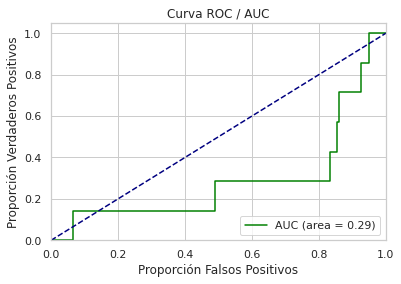

In [ ]:
#Gráfica
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Falsos Positivos')
plt.ylabel('Proporción Verdaderos Positivos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()
#Como se observa, el modelo tiene un desempeño deficiente con sólo un 29% bajo a curva ROC

###**Fuentes de bases de datos:**
#####**Pregunta 5**
INEGI (2018). “Cuestionario de Salud de Adultos (20 años o más)”, Encuesta Nacional de Salud y Nutrición, ENSANUT 2018, Componente de Salud, INEGI e INSP, México. Recuperado de: https://ensanut.insp.mx/encuestas/ensanut2018/descargas.php 
